# Colorbars

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

* 就跟之前示範的一樣，我們可以用 `plt.colorbar()` 來做出 colorbar

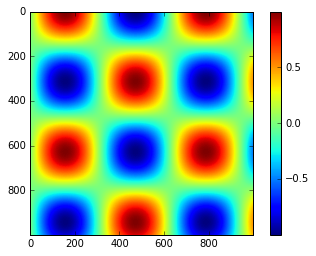

In [2]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

接下來來講些客製化細節吧

## Customizing Colorbars

* 畫圖的時候， `cmap` 這個 argument 是 color map (色彩對應表) 的縮寫，他可以決定我的圖的顏色
* 例如，我改成灰階 (數字由小到大，對應到顏色由黑到白)

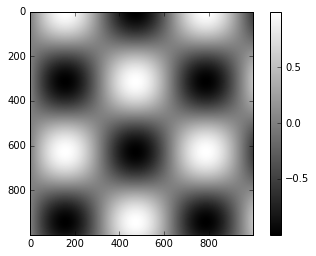

In [3]:
plt.imshow(I, cmap='gray');
plt.colorbar();

* 至於 `cmap` 可下的參數有哪些，可按 Tab 鍵看到跳出的結果：  `plt.cm.<TAB>`. 

### color bars 要用的顏色(color map)

* 大概有三種 colormap 的設定方式
  * 連續一系列的色彩 (e.g. "binary", "viridis")
  * 給兩個顏色來組出最小值到最大值的顏色 (e.g. "RdBu", "PuOr")
  * 沒有特別順序的色彩組成 (e.g. "rainbow", "jet")
* 我們來寫個函數，可以好好的視覺化不同的 colormap

In [4]:
def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    plt.imshow([colors], extent=[0, 10, 0, 1])    

#### 連續的色彩

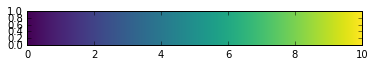

In [5]:
view_colormap("viridis") # 預設的

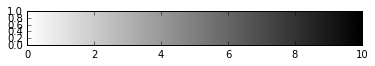

In [6]:
view_colormap("binary") # 灰階

#### 給兩個顏色

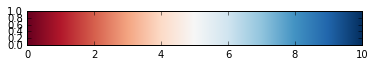

In [7]:
view_colormap("RdBu")

#### 無特定順序

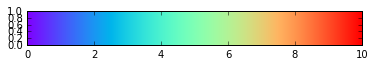

In [8]:
view_colormap("rainbow")

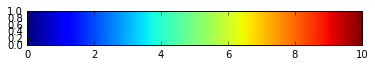

In [9]:
view_colormap("jet")

### Color limits and extensions

* `colorbar` 本身就是 `plt.Axes` 這個 class 的一個 instance. 
* 所以，所有的 axes 和 tick 都是可以設定的. 
* 馬上來看個例子：

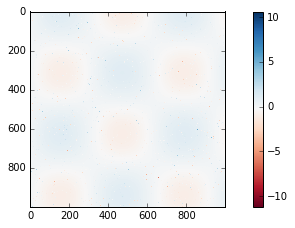

In [10]:
# 製造一個影像，裡面有 1% 的雜訊
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))
plt.imshow(I, cmap='RdBu')
plt.colorbar()

* 可以看到，color bar 為了把零星的雜訊 (值已經衝到 < -10 or >10，其實就是 outlier) 也包進來，反而原本要顯示的圖 (值介於 -1~1) 看不清楚了
* 那對於這種狀況，我可以限制我的圖的 `clim` (color limit的縮寫)，來顯示 -1 ~ 1 的點就好：

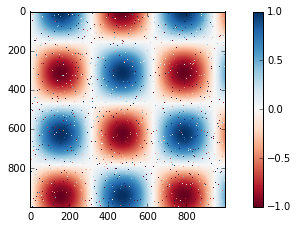

In [11]:
plt.figure(figsize=(10, 3.5))
plt.imshow(I, cmap='RdBu')
plt.clim(-1,1);
plt.colorbar();

* 已經相當不錯了，但其實那些雜訊，並不是 -1 或 1，這樣顯示會有點誤導之嫌，所以我們可以用 `extend` 這個 argument，讓 color bar 展現延伸的樣子，就會比較清楚：

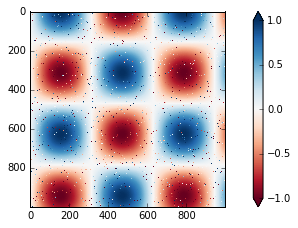

In [12]:
plt.figure(figsize=(10, 3.5))
plt.imshow(I, cmap='RdBu')
plt.clim(-1,1);
plt.colorbar(extend='both');

### 離散的 color bars

Colormaps are by default continuous, but sometimes you'd like to represent discrete values.
The easiest way to do this is to use the ``plt.cm.get_cmap()`` function, and pass the name of a suitable colormap along with the number of desired bins:

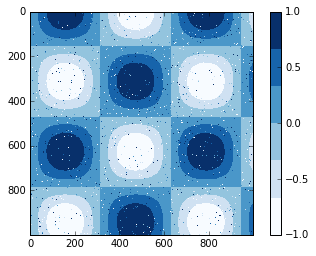

In [13]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

The discrete version of a colormap can be used just like any other colormap.

## Example: Handwritten Digits

* 我們來看一下手寫資料視覺化的例子. 
* 這些資料在 scikit-learn 中可以找到，有接近 2000 個 8x8 的圖片. 
* 我們下載 0~5 的數字影像，然後看一下長怎樣：

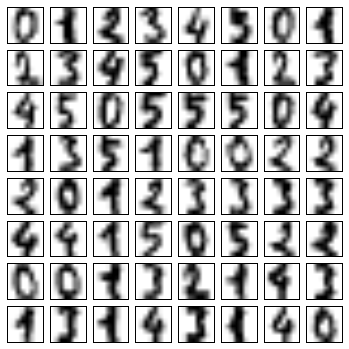

In [14]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

* 每一張圖片，都是 8x8，共 64 個像素，所以一張圖片可以看成在 64 維空間裡的一個點。每一個維度表示那個對應像素的亮度。  
* 接下來，我們把它降到 2 維，再畫散布圖看看：

In [15]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

/Volumes/GoogleDrive/我的雲端硬碟/0. codepool_python/python_ds/python_ds_env/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Volumes/GoogleDrive/我的雲端硬碟/0. codepool_python/python_ds/python_ds_env/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


* 我們將用離散型 color map，來顯示這些點：

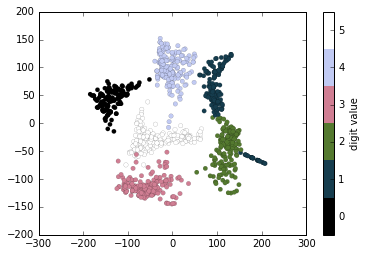

In [16]:
# plot the results
plt.scatter(projection[:, 0], 
            projection[:, 1], 
            lw=0.1,
            c=digits.target, 
            cmap=plt.cm.get_cmap('cubehelix', 6)) # 離散型的 6 個顏色怎選？我選 cubehelix 中的 6 個
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

* 從圖可以看到， 5 和 3 有些微重疊，所以看來這兩個類別分得不太乾淨。但像 0 和 1 就很好分。